In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_test_data = pd.merge(mouse_drug_data, clinical_data, on="Mouse ID")

# Display the data table for preview
combined_test_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_test_data.groupby("Drug")["Timepoint"].count()
mean_tumor_volume = combined_test_data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_data_df = mean_tumor_volume["Tumor Volume (mm3)"].mean().to_frame()

# Preview DataFrame
tumor_data_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvol_std_error = combined_test_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
tumorvol_df = tumorvol_std_error.to_frame()

# Preview DataFrame
tumorvol_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames
new_df = tumor_data_df.unstack(0)
tumor_data = new_df["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


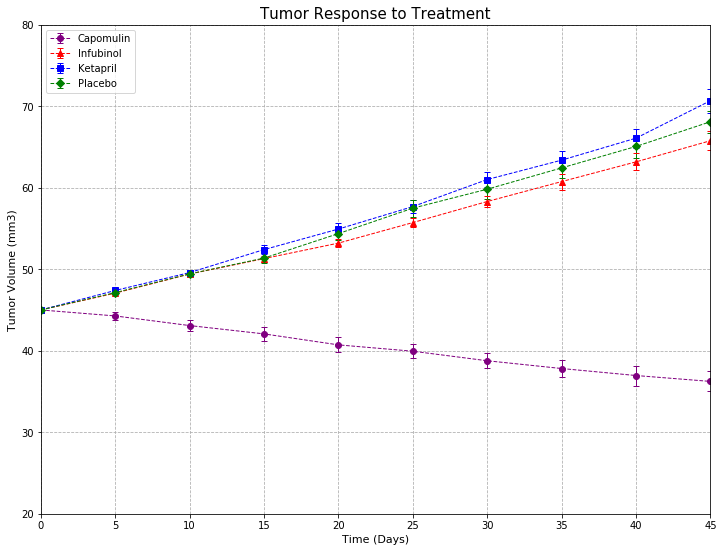

In [14]:
# Generate the Plot (with Error Bars)

x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(12,9))

error = tumorvol_df["Tumor Volume (mm3)"]["Capomulin"]
Capomulin = plt.errorbar(x_axis, tumor_data["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="purple")

error = tumorvol_df["Tumor Volume (mm3)"]["Infubinol"]
Infubinol = plt.errorbar(x_axis, tumor_data["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = tumorvol_df["Tumor Volume (mm3)"]["Ketapril"]
Ketapril = plt.errorbar(x_axis, tumor_data["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")

error = tumorvol_df["Tumor Volume (mm3)"]["Placebo"]
Placebo = plt.errorbar(x_axis, tumor_data["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=15)
plt.xlabel("Time (Days)", fontsize=11)
plt.ylabel("Tumor Volume (mm3)", fontsize=11)

plt.grid(linestyle="dashed")
plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=10)
plt.show()

In [15]:
# Save the Figure
plt.savefig('tumor_response.png')

<Figure size 432x288 with 0 Axes>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_test_data.groupby("Drug")["Timepoint"].count()
metastatic_response = combined_test_data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
metastatic_df = metastatic_response["Metastatic Sites"].mean().to_frame()

# Preview DataFrame
metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_std_error = combined_test_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
metastatic_std_df = metastatic_std_error.to_frame()

# Preview DataFrame
metastatic_std_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [23]:
# Minor Data Munging to Re-Format the Data Frames
metastaticdata_df = metastatic_df.unstack(0)
metastatic_data = metastaticdata_df["Metastatic Sites"]

# Preview that Reformatting worked
metastatic_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


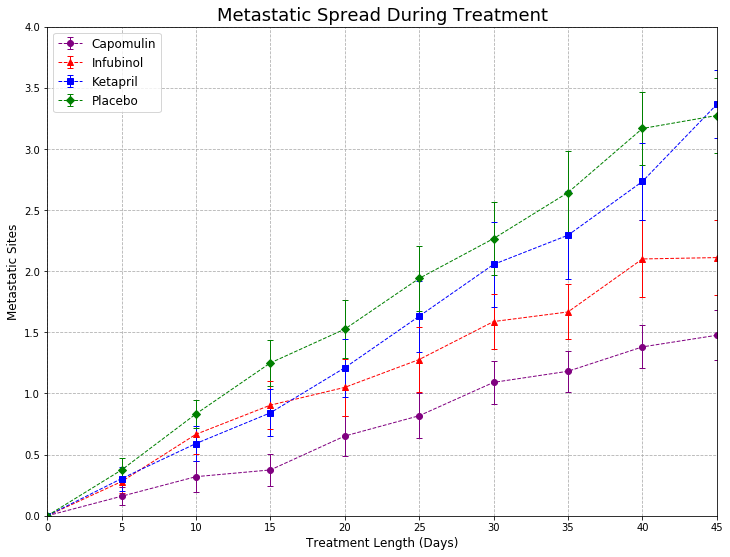

In [25]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(12,9))

error2 = metastatic_std_df["Metastatic Sites"]["Capomulin"]
Capomulin2 = plt.errorbar(x_axis, metastatic_data["Capomulin"], yerr=error2, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3, color="purple")

error2 = metastatic_std_df["Metastatic Sites"]["Infubinol"]
Infubinol2 = plt.errorbar(x_axis, metastatic_data["Infubinol"], yerr=error2, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3, color="red")

error2 = metastatic_std_df["Metastatic Sites"]["Ketapril"]
Ketapril2 = plt.errorbar(x_axis, metastatic_data["Ketapril"], yerr=error2, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3, color="blue")

error2 = metastatic_std_df["Metastatic Sites"]["Placebo"]
Placebo2 = plt.errorbar(x_axis, metastatic_data["Placebo"], yerr=error2, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3, color="green")

plt.ylim(0, 4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment", fontsize=18)
plt.xlabel("Treatment Length (Days)", fontsize=12)
plt.ylabel("Metastatic Sites", fontsize=12)

plt.grid(linestyle="dashed")
plt.legend((Capomulin2, Infubinol2, Ketapril2, Placebo2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

In [26]:
plt.savefig('metastatic_response.png')

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)